In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  '#373e4b',
    "axes.facecolor": '#373e4b',
})

Dimension de X: (2, 100)
Dimension de y: (1, 100)


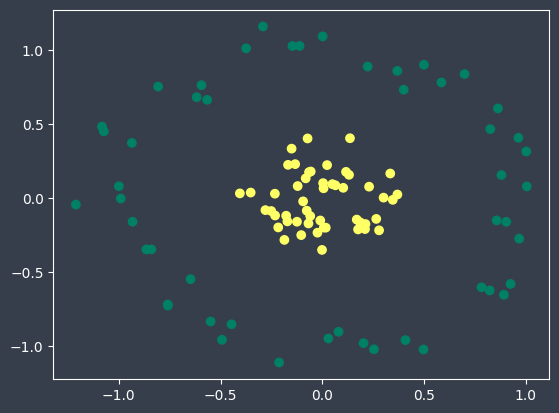

100

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.2, random_state=8)
X = X.T
y=y.reshape((1, y.shape[0]))

print("Dimension de X:", X.shape)
print("Dimension de y:", y.shape)
plt.scatter(X[0, :], X[1, :], c=y, cmap="summer")
plt.show()


y.shape[1]

In [4]:
def initialisation(dimensions):
    parametres = {}
    C = len(dimensions)
    
    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)
    
    return parametres

In [5]:
def forward_propagation(X, parametres):
    activations = {'A0': X}

    C = len(parametres) // 2

    for c in range(1, C + 1):
        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
        #print(Z.max())
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))
    return activations

In [6]:
def back_propagation(y, activations, parametres):
    
    m = y.shape[1]
    C = len(parametres) // 2
    
    dZ = activations['A' + str(C)] - y
    gradients = {}
    
    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1 / m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
    return gradients

In [7]:
def update(gradients, parametres, learning_rate):
    
    C = len(parametres) // 2
    
    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]
    
    return parametres

In [8]:
def predict(X,parametres):
    activations = forward_propagation(X,parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    #print(A2)
    return Af >= 0.5

In [9]:
def neural_network(X, y, hidden_layers, learning_rate = 0.1, n_iter = 1000):
    np.random.seed(0)
    # initialisation W, b
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation(dimensions)

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        C = len(parametres) // 2
        #print("y:", y.shape)
        #print("A:", activations['A' + str(C)].shape)
        train_loss.append(log_loss(y, activations['A' + str(C)]))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
    print(train_acc[len(train_acc)-1])    
    #Visualisation des résultats
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres,train_acc

100%|██████████| 1000/1000 [00:01<00:00, 773.47it/s]


1.0


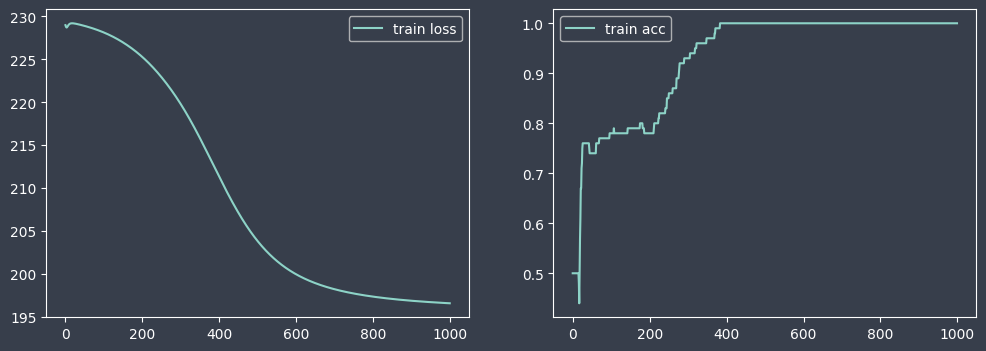

In [10]:
parametres,train_acc=neural_network(X, y, hidden_layers=(16,16,16), learning_rate = 0.2, n_iter = 1000)

In [12]:
parametres

{'W1': array([[ 2.22101332e+00,  7.08603347e-01],
        [ 2.04483556e+00,  4.12968735e+00],
        [ 1.91239991e+00, -1.24168404e+00],
        [ 1.17736934e+00, -4.46563548e-01],
        [ 6.99135420e-02,  7.37810656e-01],
        [ 8.52368720e-02,  3.00656034e+00],
        [ 2.05103587e-01,  7.47534145e-01],
        [ 4.89049670e-01,  3.40482893e-01],
        [ 2.04526350e+00, -3.37795067e-01],
        [ 5.53982817e-01, -1.68508940e+00],
        [-4.33652998e+00,  2.90951988e-01],
        [ 2.04021451e+00, -1.25628589e+00],
        [ 2.30667052e+00, -1.87061740e+00],
        [-4.29438426e-01, -3.08858301e-01],
        [ 1.88278690e+00,  1.48643142e+00],
        [ 2.73160108e-01,  8.50257007e-05]]),
 'b1': array([[-1.47501432],
        [-2.31258454],
        [-0.93349063],
        [ 0.22123186],
        [ 0.98784685],
        [ 1.53313552],
        [-0.07505491],
        [-0.36162463],
        [-1.32943221],
        [-1.46426572],
        [-2.0111303 ],
        [ 1.69464926],
      